In [148]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf

In [149]:
nifty50=pd.read_csv('NIFTY50.csv')

In [150]:
symbol=nifty50[['SYMBOL']]
nifty50.columns


Index(['SYMBOL'], dtype='object')

In [160]:
for name, values in nifty50.iteritems():
    for index in values:
        tcs=get_history(index,start=datetime(2021,2,1),end=datetime(2021,12,20))
        tcs.to_csv("stocks/{index}.csv".format(index=index))
        print(index)
    #print('{name}: {value}'.format(name=name, value=values))

RELIANCE
ADANIPORTS
GRASIM
M&M
COALINDIA
HDFCBANK
HDFC
INDUSINDBK
KOTAKBANK
JSWSTEEL
EICHERMOT
DIVISLAB
BPCL
BHARTIARTL
ITC
ONGC
HDFCLIFE
TATASTEEL
TATACONSUM
HINDALCO
TECHM
BRITANNIA
INFY
TATAMOTORS
HCLTECH
HINDUNILVR
HEROMOTOCO
MARUTI
SBILIFE
IOC
ASIANPAINT
LT
WIPRO
SBIN
CIPLA
AXISBANK
UPL
TITAN
POWERGRID
ICICIBANK
BAJAJ-AUTO
NTPC
TCS
ULTRACEMCO
NESTLEIND
BAJFINANCE
DRREDDY
BAJAJFINSV
SHREECEM
SUNPHARMA


In [93]:
tcs=get_history('TCS',start=datetime(2021,2,1),end=datetime(2021,12,20))

In [94]:
tcs.to_csv("TCS.csv")

In [161]:
daily = pd.read_csv('TCS.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.tail(3)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-05-26,TCS,EQ,3114.0,3120.00,3165.00,3103.80,3158.00,3158.5,3143.41,1923753,6.047145e+14,98431,937133,0.4871
2021-05-27,TCS,EQ,3158.5,3161.95,3217.75,3161.80,3198.00,3180.0,3189.10,5959785,1.900635e+15,181046,3733267,0.6264
2021-05-28,TCS,EQ,3180.0,3189.50,3198.00,3135.65,3146.35,3143.6,3161.25,1763701,5.575493e+14,98509,941310,0.5337


In [163]:
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe

### We need to define two windows: Short term window and Long-term window
### and plot the graph with points where upturn and downturn happen

short_window = 44

daily["44_obs_for_SMA"] = daily["Close"].rolling(window=short_window).mean()

In [164]:
daily.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,44_obs_for_SMA
Date,,,,,,,,,,,,,,,
2021-05-24,TCS,EQ,3080.5,3081.50,3105.00,3072.00,3082.45,3081.5,3089.42,1652260,5.104527e+14,79516,896770,0.5428,3130.553409
2021-05-25,TCS,EQ,3081.5,3092.00,3128.25,3082.10,3115.00,3114.0,3111.62,1841613,5.730396e+14,122270,902281,0.4899,3130.577273
2021-05-26,TCS,EQ,3114.0,3120.00,3165.00,3103.80,3158.00,3158.5,3143.41,1923753,6.047145e+14,98431,937133,0.4871,3133.350000
2021-05-27,TCS,EQ,3158.5,3161.95,3217.75,3161.80,3198.00,3180.0,3189.10,5959785,1.900635e+15,181046,3733267,0.6264,3136.300000
2021-05-28,TCS,EQ,3180.0,3189.50,3198.00,3135.65,3146.35,3143.6,3161.25,1763701,5.575493e+14,98509,941310,0.5337,3136.617045


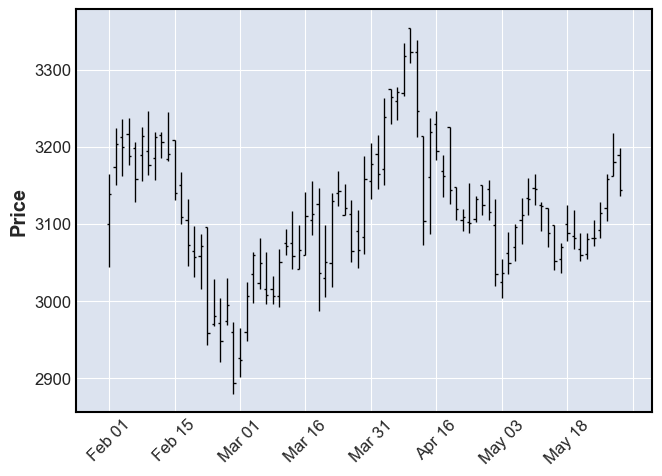

In [96]:
mpf.plot(daily)

In [98]:
plt.style.use('ggplot')

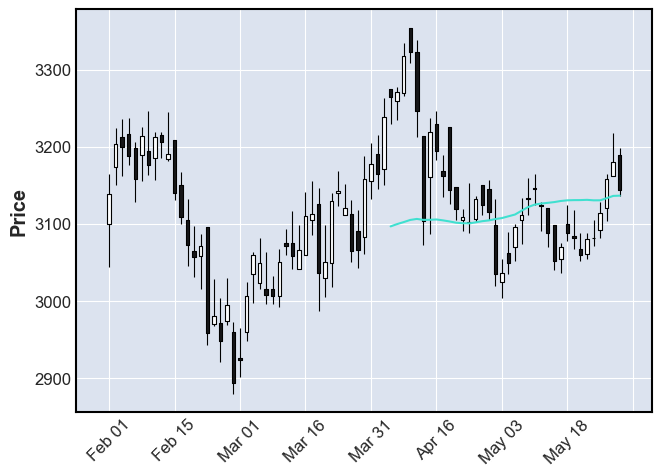

In [99]:
mpf.plot(daily,type='candle',mav=44)

In [119]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

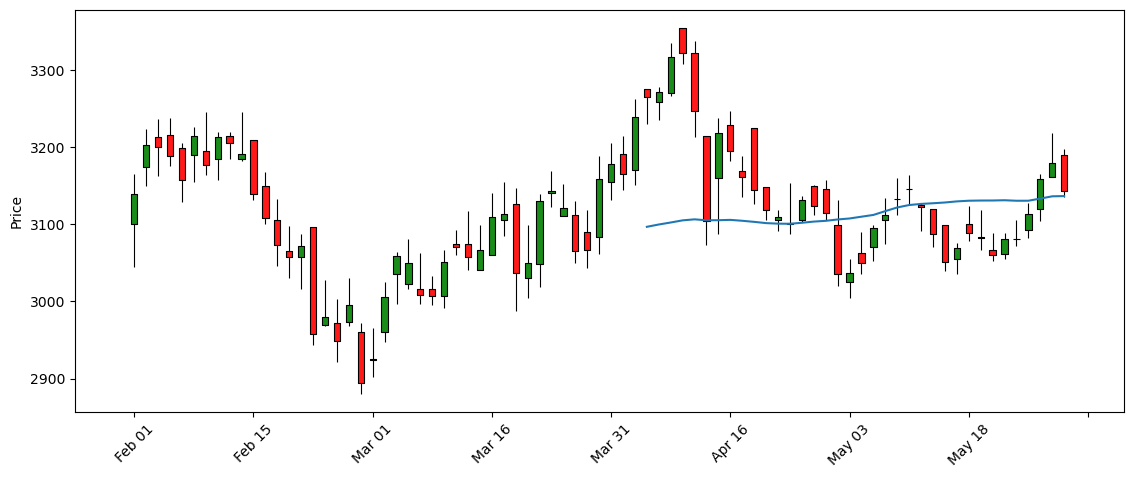

In [120]:
mpf.plot(daily,type='candle',figratio=(38,15),mav=44,style=s)

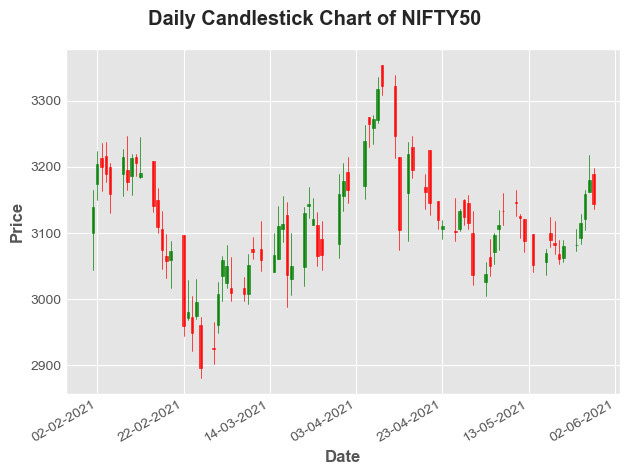

In [108]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
data = pd.read_csv('TCS.csv')
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()